In [52]:
from fastai.tabular.all import *

# Load the csv
df = pd.read_csv('./date_hood_thefts_filled.csv',
                 names=["date", "hood_id", "thefts"])
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [53]:
make_date(df, 'date')
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [54]:
add_datepart(df, 'date')
df.head()

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
1,1,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
2,2,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
3,3,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
4,4,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [55]:
splits = EndSplitter(valid_pct=0.4, valid_last=True)(range_of(df))
tabular_pandas = TabularPandas(
    df, procs=[Categorify, FillMissing, Normalize],
    cat_names=['hood_id', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'thefts'],'], 
    cont_names=[],
    y_names="thefts", splits=splits)

tabular_pandas.xs.iloc[:5]


/home/vscode/.local/lib/python3.10/site-packages/fastai/tabular/core.py:279: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts-self.means) / self.stds


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1,1,1,1,1,4,1,1,2,1,2,1,2
1,2,1,1,1,1,4,1,1,2,1,2,1,2
2,3,1,1,1,1,4,1,1,2,1,2,1,2
3,4,1,1,1,1,4,1,1,2,1,2,1,2
4,5,1,1,1,1,4,1,1,2,1,2,1,2


In [56]:
data_loader = tabular_pandas.dataloaders(bs=64)
data_loader.show_batch()

/home/vscode/.local/lib/python3.10/site-packages/fastai/tabular/core.py:284: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts*self.stds ) + self.means


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,thefts
0,57,2016,5,21,27,4,148,False,False,False,False,False,False,0
1,88,2017,10,41,13,4,286,False,False,False,False,False,False,0
2,51,2018,3,10,7,2,66,False,False,False,False,False,False,0
3,99,2018,12,48,1,5,335,False,True,False,False,False,False,0
4,97,2015,10,40,4,6,277,False,False,False,False,False,False,0
5,5,2016,2,8,24,2,55,False,False,False,False,False,False,0
6,125,2019,2,5,1,4,32,False,True,False,False,False,False,0
7,124,2018,10,43,23,1,296,False,False,False,False,False,False,0
8,53,2017,9,37,16,5,259,False,False,False,False,False,False,0
9,154,2015,8,35,26,2,238,False,False,False,False,False,False,0


In [57]:
learn = tabular_learner(data_loader, metrics=exp_rmspe)


In [58]:
learn.fit_one_cycle(2)


epoch,train_loss,valid_loss,_exp_rmspe,time
0,0.127356,0.154480,0.297404,00:44
1,0.126069,0.153981,0.310108,00:43


In [59]:
learn.show_results()


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,thefts,thefts_pred
0,59,0,12,52,27,7,362,1,1,1,1,1,1,0,0.071931
1,58,5,9,38,22,7,265,1,1,1,1,1,1,0,0.071475
2,89,0,1,3,16,4,16,1,1,1,1,1,1,0,0.070033
3,14,0,2,7,14,5,45,1,1,1,1,1,1,0,0.066886
4,29,0,1,3,19,2,19,1,1,1,1,1,1,0,0.063829
5,135,0,2,6,9,3,40,1,1,1,1,1,1,0,0.062181
6,144,0,3,10,11,4,70,1,1,1,1,1,1,0,0.019728
7,131,0,9,37,9,3,253,1,1,1,1,1,1,0,0.195882
8,154,0,3,14,30,1,90,1,1,1,1,1,1,0,0.007076


In [60]:
# Get the predictions and target values
preds, targs = learn.get_preds()
print(preds)
print(targs)


tensor([[0.1942],
        [0.1992],
        [0.1314],
        ...,
        [0.0291],
        [0.0353],
        [0.0291]])
tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=torch.int8)


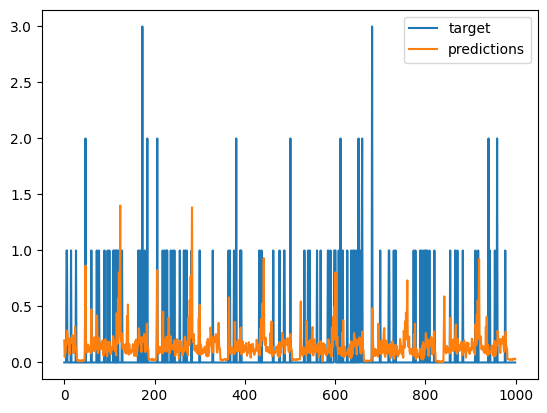

In [61]:
# Plot predictions vs target in a line plot las 4000 values
plt.plot(targs[-1000:], label='target')
plt.plot(preds[-1000:], label='predictions')
plt.legend()
plt.show()